In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from tqdm import tqdm
import random
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
classes = {'glioma_tumor':0,'no_tumor': 1,'meningioma_tumor':2, 'pituitary_tumor': 3}





In [2]:

image_size = 150
X, Y = [], []
for cls in labels:
    pth = 'Data/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (image_size,image_size))
        X.append(img)
        Y.append(classes[cls])
     
for cls in labels:
    pth = 'Data/Testing/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (image_size,image_size))
        X.append(img)
        Y.append(classes[cls])
        
X_train = np.array(X)
print(X_train.shape)  
y_train = np.array(Y)

(3264, 150, 150)


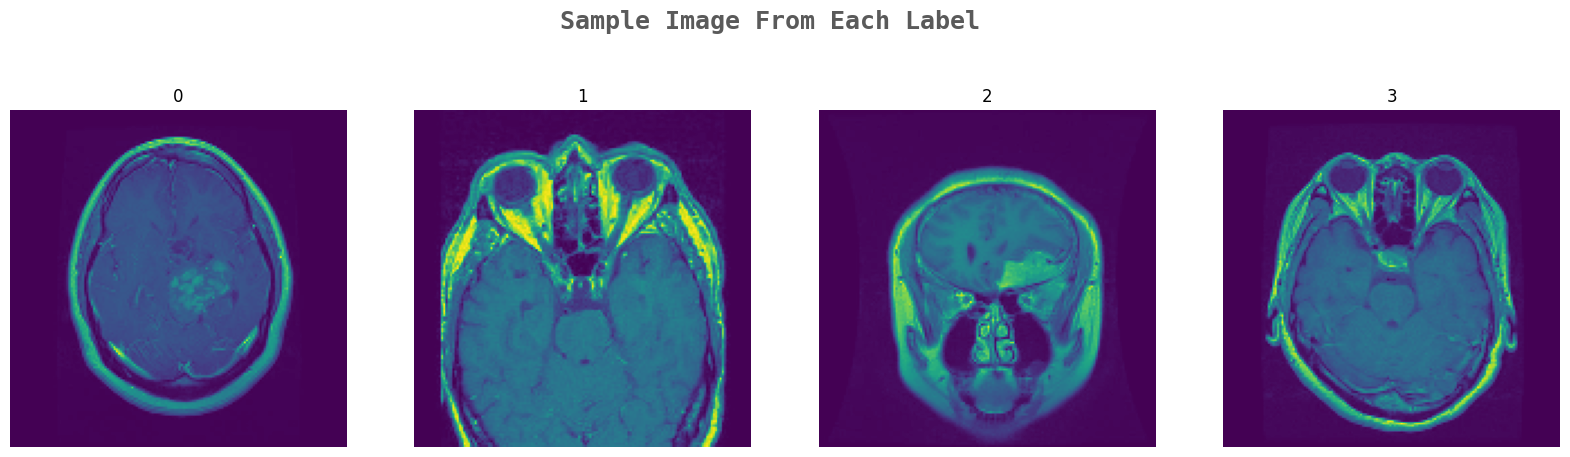

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==classes[i]:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:

X_updated_train = X_train.reshape(len(X_train), -1)
X_updated_train.shape

(3264, 22500)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_updated_train,y_train, test_size=0.2,random_state=156)
svm = SVC().fit(X_train,y_train)


In [7]:
pred = svm.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.77       171
           1       0.91      0.74      0.82        99
           2       0.82      0.81      0.82       197
           3       0.89      0.95      0.92       186

    accuracy                           0.84       653
   macro avg       0.85      0.82      0.83       653
weighted avg       0.84      0.84      0.84       653



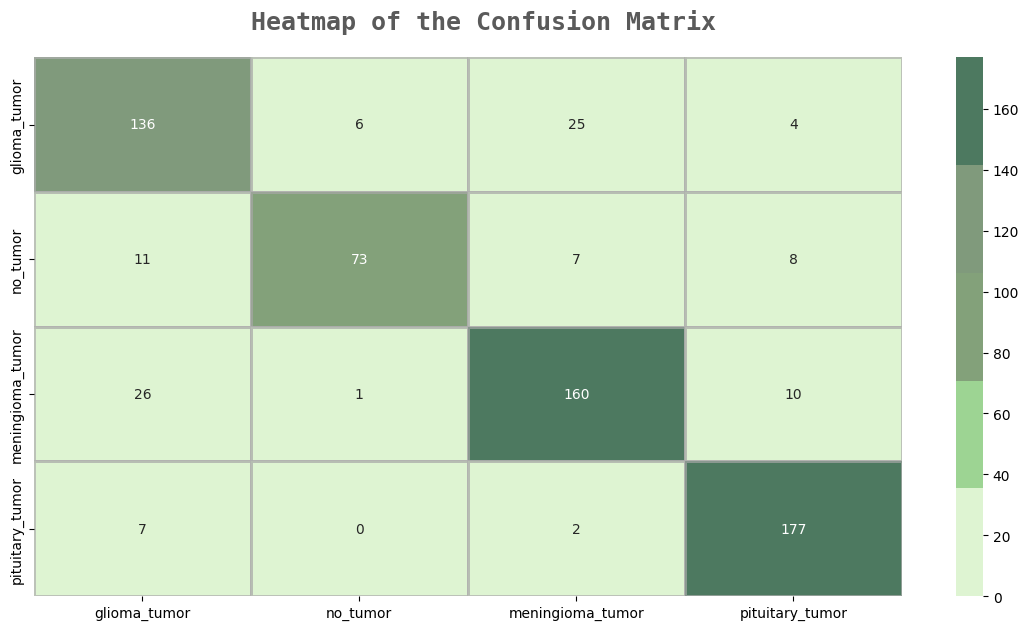

In [9]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3],fmt='d')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [10]:
def make_pred_from_picture(tumor_type):
    plt.figure(figsize = (12,8))
    dec = {0:'glioma_tumor', 1:'no_tumor',2:'meningioma_tumor', 3:'pituitary_tumor'}

    c=1

    # Get a list of all the image filenames in the folder
    filenames = os.listdir(f'Data/Testing/{tumor_type}/')

    # Generate 9 random indices
    indices = random.sample(range(len(filenames)), 9)

    # Get the 9 random filenames using the random indices
    random_filenames = [filenames[i] for i in indices]

    # Loop through the random filenames and make predictions
    for i in random_filenames:
        plt.subplot(3,3,c)
        img=cv2.imread(f'Data/Testing/{tumor_type}/'+i, 0)
        img1=cv2.resize(img, (image_size,image_size))
        img1 = img1.reshape(1,-1)
        p = svm.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        c+=1


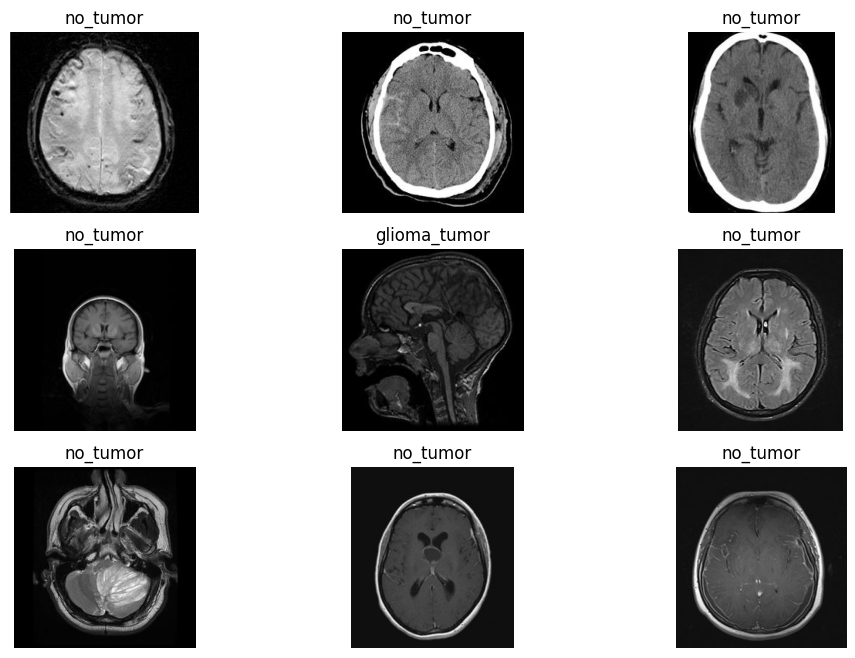

In [15]:
make_pred_from_picture("no_tumor")

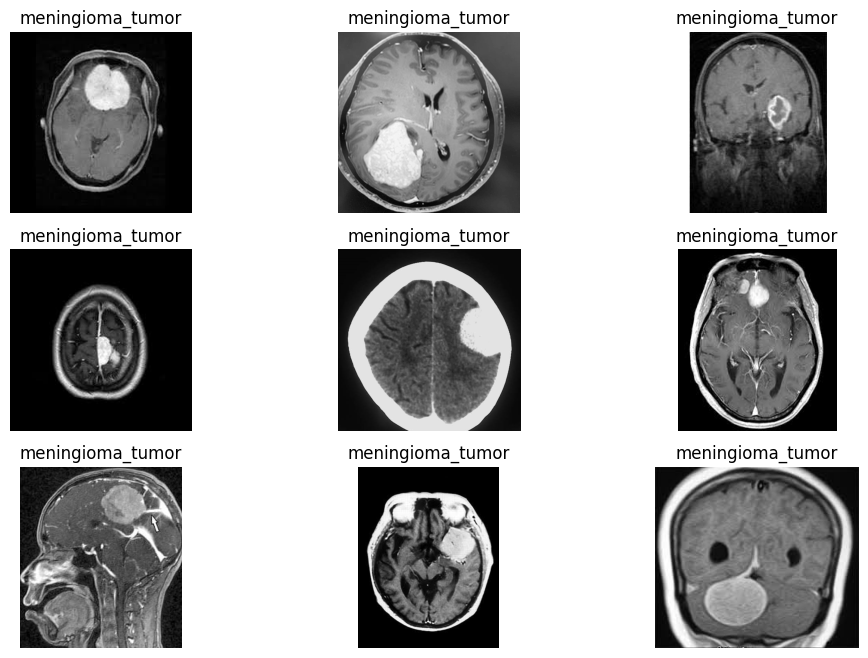

In [16]:
make_pred_from_picture("meningioma_tumor")

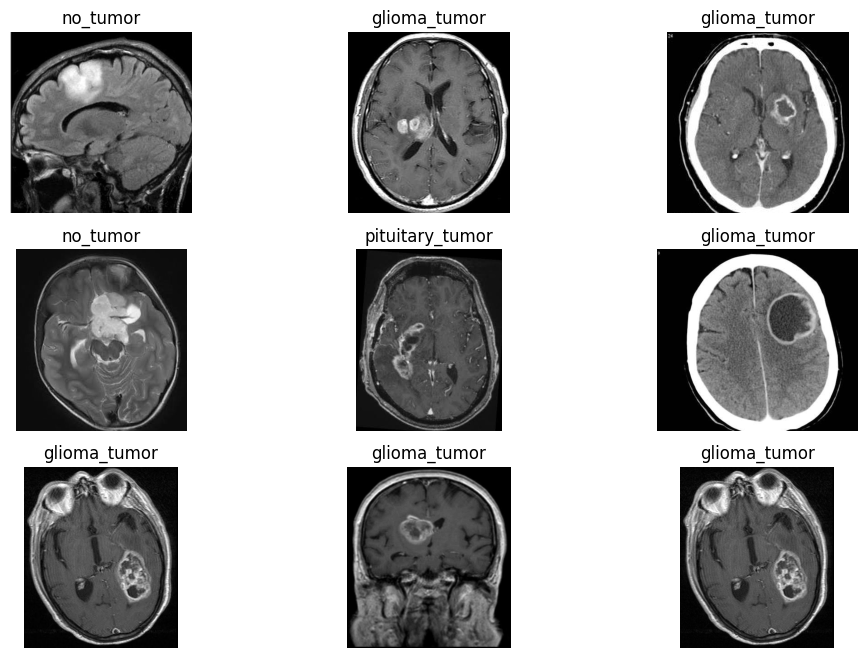

In [17]:
make_pred_from_picture("glioma_tumor")

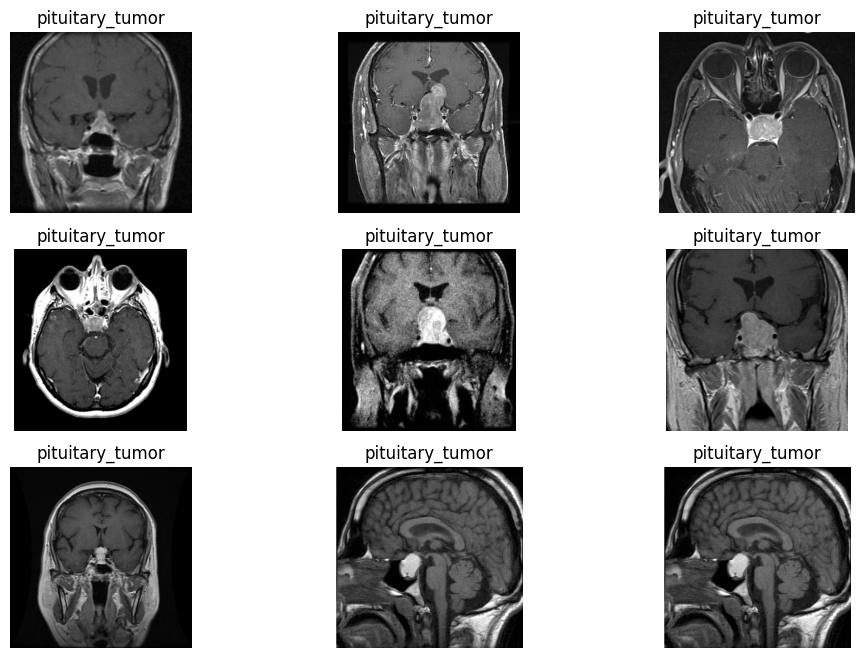

In [18]:
make_pred_from_picture("pituitary_tumor")